In [135]:
import pandas as pd
import os.path

## 0. Set variables

In [136]:
username='hagailevi'
dec_folder='dec' # mai_dec
ds_path=f"/home/elkon2/{username}/PRS/datasets/{dec_folder}/"
imp="impX/"
# make sure to mkdir impX in all the data_dirs

gwas_path=f"/specific/elkon/{username}/PRS/GWASs/"

In [137]:
# once you decide the dirs names, mkdir them all
# data="bcac_onco_afr/"
# my_data_dir="mai_bcac_onco_afr_all/"
# discovery="mai_bcac_onco_afr_no_1200_usa/"
# target="mai_bcac_onco_afr_1200_usa/"
# pop="afr"

data="bcac_onco_eas1/"
my_data_dir="bcac_onco_eas1/"
discovery="bcac_onco_eas1/"
target="bcac_onco_eas_thai/"
pop="EAS"
ds_name="ds0"

## 1. Filter datasets

#### Update snps names

In [106]:
# ds_file_path=ds_path+data+imp+"ds.QC.bim"
ds_file_path=ps.path.join(ds_path, data, imp, f"{ds_name}.bim")
bim_df=pd.read_csv(ds_file_path,header=None,sep="\t")
display(bim_df.head(3))
bim_df.shape

,0,1,2,3,4,5
0,1,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,0,10616,CCGCCGTTGCAAAGGCGCGCCG,C
1,1,1:10642:G:A,0,10642,A,G
2,1,1:11008:C:G,0,11008,G,C


(20734271, 6)

In [107]:
func = lambda x: x.split(':')[0] if 'rs' in x else None
my_ds_df=bim_df
my_ds_df[6] = my_ds_df[1].apply(func)
display(my_ds_df.head(3))

,0,1,2,3,4,5,6
0,1,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,0,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519
1,1,1:10642:G:A,0,10642,A,G,None
2,1,1:11008:C:G,0,11008,G,C,None


In [108]:
my_ds_df=my_ds_df.dropna()
display(my_ds_df.head(3))

,0,1,2,3,4,5,6
0,1,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,0,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519
5,1,rs201725126:13116:T:G,0,13116,G,T,rs201725126
6,1,rs200579949:13118:A:G,0,13118,G,A,rs200579949


In [392]:
#### CHECK ALL VALID ####
# filtered = my_ds_df[6].str.contains('rs')
# print(filtered)
# true_count = filtered.sum()
# print(true_count)

#### Remove duplicates and snps from different chrom and same position

In [109]:
filtered_ds_df=my_ds_df.groupby(3, as_index=False,sort=False).first()
filtered_ds_df = filtered_ds_df.reindex(columns=my_ds_df.columns)
display(filtered_ds_df.head(3)) 

,0,1,2,3,4,5,6
0,1,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,0,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519
1,1,rs201725126:13116:T:G,0,13116,G,T,rs201725126
2,1,rs200579949:13118:A:G,0,13118,G,A,rs200579949


In [110]:
filtered_ds_df_nodup=filtered_ds_df.drop_duplicates(subset=[6])
display(filtered_ds_df_nodup.head(3))

,0,1,2,3,4,5,6
0,1,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,0,10616,CCGCCGTTGCAAAGGCGCGCCG,C,rs376342519
1,1,rs201725126:13116:T:G,0,13116,G,T,rs201725126
2,1,rs200579949:13118:A:G,0,13118,G,A,rs200579949


#### Create snps mapping file

In [111]:
snp_map=filtered_ds_df_nodup[[1,6]]
display(snp_map.head(3))
to_extract=snp_map[[1]]
display(to_extract.head(3))

,1,6
0,rs376342519:10616:CCGCCGTTGCAAAGGCGCGCCG:C,rs376342519
1,rs201725126:13116:T:G,rs201725126
2,rs200579949:13118:A:G,rs200579949


,6
0,rs376342519
1,rs201725126
2,rs200579949


In [112]:
out_path=ds_path+my_data_dir+imp+"snps_mapping"
snp_map.to_csv(out_path,header=False, index=False, sep='\t')

In [113]:
out_path=ds_path+my_data_dir+imp+"to_extract"
to_extract.to_csv(out_path,header=False, index=False, sep='\t')

#### function call in bash : update snps names and extract only the desired snps

In [115]:
print("run the following command in bash:")
print(".........................")
# print(f'plink --bfile {ds_path}{data}{imp}ds.QC --update-name {ds_path}{my_data_dir}{imp}snps_mapping \
# --make-bed --out {ds_path}{my_data_dir}{imp}ds.QC2')
# print(".........................")
# print(f'plink --bfile {ds_path}{my_data_dir}{imp}ds.QC2 --extract {ds_path}{my_data_dir}{imp}to_extract \
# --make-bed --out {ds_path}{my_data_dir}{imp}ds.QC3')
print(f'plink --bfile {ds_path}{data}{imp}ds0 --extract {ds_path}{my_data_dir}{imp}to_extract --make-bed --out {ds_path}{my_data_dir}{imp}ds.QC2 && \\')
print(f'plink --bfile {ds_path}{my_data_dir}{imp}ds.QC2 --update-name {ds_path}{my_data_dir}{imp}snps_mapping  \
--make-bed --out {ds_path}{my_data_dir}{imp}ds')
print(".........................")

run the following command in bash:
.........................
plink --bfile /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/ds0 --extract /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/to_extract --make-bed --out /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/ds.QC2 && \
plink --bfile /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/ds.QC2 --update-name /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/snps_mapping  --make-bed --out /home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas2/impX/ds
.........................


,super_pop,pop
0,,
BCAC-10000042,EAS,Korea
BCAC-10001931,EAS,Thailand
BCAC-10004924,EAS,Hong Kong
BCAC-10005455,EAS,Hong Kong
BCAC-10009312,EAS,China


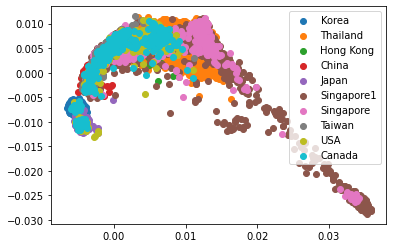

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
df_pca=pd.read_csv("/home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas_all/impX/ds.eigenvec", sep=' ', index_col=0, header=None).iloc[:,1:]
df_pop=pd.read_csv("/home/elkon2/hagailevi/PRS/datasets/dec/bcac_onco_eas_all/pop.panel.pca", sep='\t', index_col=0).iloc[:,1:]
df_pop=df_pop.loc[df_pca.index]
for a in df_pop['pop'].unique():
    ids=df_pop[df_pop['pop']==a].index
    plt.scatter(df_pca.loc[ids].iloc[:,0], df_pca.loc[ids].iloc[:,1], label=a)
plt.legend()
display(df_pop.head())

## 2. devide into 2 datasets

In [79]:
pop_panel_path=ds_path+data+"pop.panel"
pop_panel_df=pd.read_csv(pop_panel_path,header=None,sep='\t')
print(pop_panel_df)

                   0              1          2         3
0                FID            IID  super_pop       pop
1      BCAC-32177711  BCAC-32177711        EAS  Thailand
2      BCAC-23766888  BCAC-23766888        EAS  Thailand
3      BCAC-53600637  BCAC-53600637        EAS  Thailand
4      BCAC-63656834  BCAC-63656834        EAS  Thailand
...              ...            ...        ...       ...
20162  BCAC-16288304  BCAC-16288304        EAS    Taiwan
20163  BCAC-30575450  BCAC-30575450        EAS    Taiwan
20164  BCAC-98382585  BCAC-98382585        EAS    Taiwan
20165  BCAC-41282705  BCAC-41282705        EAS    Taiwan
20166  BCAC-56282610  BCAC-56282610        EAS       USA

[20167 rows x 4 columns]


#### In order to choose the population to be put aside, run the next command in bash:
#### ctu -f 4 pop.panel | sort | uniq | -d -c
make sure to choose wisely a population that represents best all the samples.
can be considered using PCA dot graph.
must be over 1000 samples of the chosen population


In [128]:
# update according to your choice
# chosen_pop='USA'
# sample_size=1200
chosen_pop='Thailand'  
sample_size=1395

In [86]:
sub_pop_ds=pop_panel_df[pop_panel_df[3]==chosen_pop]
print(sub_pop_ds)

                  0              1    2         3
1     BCAC-32177711  BCAC-32177711  EAS  Thailand
2     BCAC-23766888  BCAC-23766888  EAS  Thailand
3     BCAC-53600637  BCAC-53600637  EAS  Thailand
4     BCAC-63656834  BCAC-63656834  EAS  Thailand
5     BCAC-32977379  BCAC-32977379  EAS  Thailand
...             ...            ...  ...       ...
1391  BCAC-60150565  BCAC-60150565  EAS  Thailand
1392  BCAC-56006359  BCAC-56006359  EAS  Thailand
1393  BCAC-83037973  BCAC-83037973  EAS  Thailand
1394  BCAC-32478826  BCAC-32478826  EAS  Thailand
1395  BCAC-50801270  BCAC-50801270  EAS  Thailand

[1395 rows x 4 columns]


In [88]:
random_sample = sub_pop_ds.sample(n=sample_size, random_state=42)
print(random_sample)

                  0              1    2         3
1217  BCAC-21361520  BCAC-21361520  EAS  Thailand
421   BCAC-65030163  BCAC-65030163  EAS  Thailand
1384  BCAC-44649403  BCAC-44649403  EAS  Thailand
701   BCAC-23274080  BCAC-23274080  EAS  Thailand
600   BCAC-91237545  BCAC-91237545  EAS  Thailand
...             ...            ...  ...       ...
1096  BCAC-94017466  BCAC-94017466  EAS  Thailand
1131  BCAC-44537491  BCAC-44537491  EAS  Thailand
1295  BCAC-86510682  BCAC-86510682  EAS  Thailand
861   BCAC-99747378  BCAC-99747378  EAS  Thailand
1127  BCAC-12628795  BCAC-12628795  EAS  Thailand

[1395 rows x 4 columns]


In [89]:
to_gwas = pop_panel_df[~pop_panel_df[1].isin(random_sample[1])]
print(to_gwas)

                   0              1          2       3
0                FID            IID  super_pop     pop
1396   BCAC-57865425  BCAC-57865425        EAS  Canada
1397   BCAC-69253097  BCAC-69253097        EAS  Canada
1398   BCAC-42126061  BCAC-42126061        EAS  Canada
1399   BCAC-64786930  BCAC-64786930        EAS  Canada
...              ...            ...        ...     ...
20162  BCAC-16288304  BCAC-16288304        EAS  Taiwan
20163  BCAC-30575450  BCAC-30575450        EAS  Taiwan
20164  BCAC-98382585  BCAC-98382585        EAS  Taiwan
20165  BCAC-41282705  BCAC-41282705        EAS  Taiwan
20166  BCAC-56282610  BCAC-56282610        EAS     USA

[18772 rows x 4 columns]


In [93]:
out_path_sample=ds_path+target+"pop.panel"
random_sample.to_csv(out_path_sample,header=False, index=False, sep='\t')

out_path_no_sample=ds_path+discovery+"pop.panel"
to_gwas.to_csv(out_path_no_sample,header=False, index=False, sep='\t')

#### function call in bash

In [94]:
bfile_path=f'{ds_path}{my_data_dir}{imp}ds.QC3'
print("run the following commands in bash:")
print(".........................")
print(f'plink --bfile {bfile_path} --keep {out_path_sample} --make-bed --out {ds_path}{target}{imp}ds')
print(".........................")
print(f'plink --bfile {bfile_path} --keep {out_path_no_sample} --make-bed --out {ds_path}{discovery}{imp}ds')
print(".........................")

run the following commands in bash:
.........................
plink --bfile /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_all/impX/ds.QC3 --keep /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/pop.panel --make-bed --out /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/impX/ds
.........................
plink --bfile /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_all/impX/ds.QC3 --keep /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pop.panel --make-bed --out /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/impX/ds
.........................


#### run qc_target_data.sh on both DS
the file directory: "/specific/elkon/maibendayan/PRS/codebase/qc_target_data.sh"

In [95]:
print("function call: ")
print(".........................")
print(f'bash qc_target_data.sh --discovery={discovery.rstrip("/")} --target={target.rstrip("/")} --imp={imp.rstrip("/")}')
print(".........................")
print(f'bash qc_target_data.sh --discovery={discovery.rstrip("/")} --target={discovery.rstrip("/")} --imp={imp.rstrip("/")}')
print(".........................")

function call: 
.........................
bash qc_target_data.sh --discovery=mai_bcac_onco_eas_no_thai --target=mai_bcac_onco_eas_thai --imp=impX
.........................
bash qc_target_data.sh --discovery=mai_bcac_onco_eas_no_thai --target=mai_bcac_onco_eas_no_thai --imp=impX
.........................


#### copy pheno file to the new directories in respect to the IIDs

In [ ]:
pheno=pd.read_csv(f'{ds_path}{data}pheno', sep='\t', header=None)
pheno.columns=["FID","IID","label"]
pheno.to_csv(f'{ds_path}{my_data_dir}pheno', sep='\t', header=False,index=False)

pheno_sample=pheno[pheno["IID"].isin(random_sample[0])]
pheno_sample.to_csv(f'{ds_path}{target}pheno', sep='\t', header=True,index=False)

pheno_to_gwas=pheno[pheno["IID"].isin(to_gwas[0])]
pheno_to_gwas.to_csv(f'{ds_path}{discovery}pheno', sep='\t', header=True,index=False)

## 3. Prepare input files for GWAS 
#### (here we proccess "no_sample" file only)

#### Reformat the .covar file (=ds.eigenvec)

In [41]:
evec_path=f'{ds_path}{discovery}{imp}'
evec_file=pd.read_csv(f'{evec_path}ds.eigenvec', sep=' ', header=None)
evec_file.columns=["FID", "IID", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]
print(evec_file)
evec_file.to_csv(f'{evec_path}covar_reformatted', header=True, index=False, sep='\t')

                 FID            IID       PC1       PC2       PC3       PC4  \
0      BCAC-10000042  BCAC-10000042  0.007552 -0.001965 -0.006767  0.009670   
1      BCAC-10004924  BCAC-10004924 -0.007581 -0.004096  0.006058 -0.002442   
2      BCAC-10005455  BCAC-10005455 -0.003739 -0.008387 -0.000207 -0.007411   
3      BCAC-10009312  BCAC-10009312 -0.002486 -0.009305 -0.002186 -0.002663   
4      BCAC-10012118  BCAC-10012118  0.007525 -0.001145 -0.008167  0.007033   
...              ...            ...       ...       ...       ...       ...   
11841  BCAC-99964412  BCAC-99964412 -0.004841 -0.007820  0.000506 -0.006362   
11842  BCAC-99974969  BCAC-99974969 -0.016099  0.022453 -0.016591  0.020997   
11843  BCAC-99976900  BCAC-99976900  0.011282  0.015876  0.014570 -0.007349   
11844  BCAC-99977930  BCAC-99977930 -0.009925 -0.003827  0.006644  0.003520   
11845  BCAC-99980956  BCAC-99980956  0.007922 -0.000745 -0.005886  0.008287   

            PC5       PC6  
0      0.015545  0.0034

#### Reformat the pheno files: output is two files - pheno01 where label is 0,1 and pheno where label is 1,2

In [110]:
paths=[f'{ds_path}{discovery}',f'{ds_path}{target}']
for path in paths:
    print("................\n")
    print("function call:")
    print(f'mv {path}pheno {path}pheno01\n')
    print(f'head -n 1 {path}pheno01 > {path}pheno\n')
    command="'{ $3 = $3 + 1; print }'"
    print(f'tail -n +2 {path}pheno01 | awk {command} >> {path}pheno')
print("................")

................

function call:
mv /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno01

head -n 1 /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno01 > /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno

tail -n +2 /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno01 | awk '{ $3 = $3 + 1; print }' >> /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno
................

function call:
mv /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/pheno /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/pheno01

head -n 1 /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/pheno01 > /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_thai/pheno

tail -n +2 /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_

#### run the next command in bash:

In [111]:
pheno_path=f'{ds_path}{discovery}pheno'
bfile_path=f'{ds_path}{discovery}{imp}'

print("function call:")
print("................")
print(f'mkdir {gwas_path}{discovery.rstrip("/")}-5pcs')
print("................")
print(f'plink2 --bfile {bfile_path}ds.QC --glm no-x-sex --covar {bfile_path}covar_reformatted --covar-name \
PC1,PC2,PC3,PC4,PC5 --pheno {pheno_path} --out {gwas_path}{discovery.rstrip("/")}-5pcs/gwas --threads 4')
print("................")

function call:
................
mkdir /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs
................
plink2 --bfile /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/impX/ds.QC --glm no-x-sex --covar /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/impX/covar_reformatted --covar-name PC1,PC2,PC3,PC4,PC5 --pheno /specific/elkon/hagailevi/PRS/datasets/dec_mai/mai_bcac_onco_eas_no_thai/pheno --out /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs/gwas --threads 4
................


## 4. Process the new GAWS file we had just created

In [34]:
# #### Make sure to remove the '#' at the beginning of the file - it presents the headers as a #commant
# print(f'vim {gwas_path}{discovery.rstrip("/")}-5pcs/gwas.label.glm.logistic.hybrid')

#### Rename header to avoide conflicts

In [138]:
gwas_file=f'{gwas_path}{discovery.rstrip("/")}-5pcs/gwas.label.glm.logistic.hybrid'
if not os.path.isfile(gwas_file):
    gwas_file=f'{gwas_path}{discovery.rstrip("/")}-5pcs/gwas.label.glm.linear'
gwas_df=pd.read_csv(gwas_file, sep="\t")
gwas_df = gwas_df.rename(columns={'A1': 'A1_'})
gwas_df = gwas_df.rename(columns={'#CHROM': 'CHROM'})
print(gwas_df)
gwas_df.to_csv(f'{gwas_file}_',sep='\t',index=False,header=True)

/home/gaga/hagailevi/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


          CHROM       POS           ID REF                     ALT  \
0             1     10616  rs376342519   C  CCGCCGTTGCAAAGGCGCGCCG   
1             1     10616  rs376342519   C  CCGCCGTTGCAAAGGCGCGCCG   
2             1     10616  rs376342519   C  CCGCCGTTGCAAAGGCGCGCCG   
3             1     10616  rs376342519   C  CCGCCGTTGCAAAGGCGCGCCG   
4             1     10616  rs376342519   C  CCGCCGTTGCAAAGGCGCGCCG   
...         ...       ...          ...  ..                     ...   
94210903     22  51240820  rs202228854   C                       T   
94210904     22  51240820  rs202228854   C                       T   
94210905     22  51240820  rs202228854   C                       T   
94210906     22  51240820  rs202228854   C                       T   
94210907     22  51240820  rs202228854   C                       T   

                             A1_ FIRTH? TEST  OBS_CT           OR  LOG(OR)_SE  \
0         CCGCCGTTGCAAAGGCGCGCCG      N  ADD   13207       1.1099    0.176047 

#### run the next command in bash:

In [52]:
print("function call:")
print("................")
print(f'head -n 1 {gwas_file}_ > {gwas_path}{discovery.rstrip("/")}-5pcs/gwas_raw.tsv \n')
print(f'cat {gwas_file}_ | grep ADD >> {gwas_path}{discovery.rstrip("/")}-5pcs/gwas_raw.tsv')
print("................")

function call:
................
head -n 1 /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs/gwas.label.glm.linear_ > /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs/gwas_raw.tsv 

cat /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs/gwas.label.glm.linear_ | grep ADD >> /specific/elkon/hagailevi/PRS/GWASs/mai_bcac_onco_eas_no_thai-5pcs/gwas_raw.tsv
................


#### Prepare GWAS

In [54]:
print("function call: ")
print(".........................")
print(f'python prepare_gwas.py --discovery={discovery.rstrip("/")}-5pcs --discovery_population={pop} --N 5000')
print(".........................")  

function call: 
.........................
python prepare_gwas.py --discovery=mai_bcac_onco_eas_no_thai-5pcs --discovery_population=EAS --N 5000
.........................


#### GWAS QC!

In [55]:
print("function call: ")
print(".........................")
print(f'bash qc_discovery_data.sh --discovery={discovery.rstrip("/")}-5pcs')
print(".........................")

function call: 
.........................
bash qc_discovery_data.sh --discovery=mai_bcac_onco_eas_no_thai-5pcs
.........................


#### View the output:

In [56]:
output=f'{gwas_path}{discovery.rstrip("/")}-5pcs/gwas.QC.Transformed'
output_df=pd.read_csv(output, sep="\t")
print(output_df)

                SNP  CHR        BP A1 A2     MAF        SE         P     N  \
0         rs4553118    1    832398  T  C  0.1429  0.012961  0.981238  5000   
1        rs28593608    1    833927  C  T  0.1627  0.012053  0.613786  5000   
2        rs28385272    1    834198  C  T  0.1617  0.012061  0.560918  5000   
3         rs4422949    1    834928  G  A  0.1617  0.012059  0.524459  5000   
4        rs28570054    1    834999  A  G  0.1617  0.012056  0.521303  5000   
...             ...  ...       ... .. ..     ...       ...       ...   ...   
3907816  rs12158487   22  51161281  A  C  0.0500  0.014716  0.156971  5000   
3907817     rs10451   22  51162059  A  G  0.0500  0.007864  0.658508  5000   
3907818    rs715586   22  51163138  T  C  0.0500  0.014670  0.233302  5000   
3907819   rs6009957   22  51164287  C  T  0.0500  0.008067  0.557430  5000   
3907820   rs8137951   22  51165664  A  G  0.0500  0.008060  0.572811  5000   

         INFO        OR  
0         1.0 -0.000305  
1         1

## 5. OPTINAL: prepare DS for CV

In [127]:
n_folds=3
rep=103
n_reps=4


print("function call: ")
print(f'python create_cv_repetitions.py --dataset {target.rstrip("/")} --folds {n_folds} --rep {rep}')
print(f'bash create_cv_reps_files.sh --discovery={discovery.rstrip("/")}-5pcs --target={target.rstrip("/")} --imp={imp.rstrip("/")} --pheno="" --n_repetitions={n_reps} --n_folds={n_folds}')
print(f'bash split_train_data.sh --discovery={discovery.rstrip("/")}-5pcs --target={target.rstrip("/")} --imp={imp.rstrip("/")} --pheno="" --n_repetitions={n_reps} --n_folds={n_folds}')
print(f'bash rm_train_both_files.sh --ds={target.rstrip("/")} --imp={imp.rstrip("/")} --reps={n_reps} --folds={n_folds} --base_rep={int(n_reps)+99}')


function call: 
python create_cv_repetitions.py --dataset mai_bcac_onco_eas_thai --folds 3 --rep 103
bash create_cv_reps_files.sh --discovery=mai_bcac_onco_eas_no_thai-5pcs --target=mai_bcac_onco_eas_thai --imp=impX --pheno="" --n_repetitions=4 --n_folds=3
bash split_train_data.sh --discovery=mai_bcac_onco_eas_no_thai-5pcs --target=mai_bcac_onco_eas_thai --imp=impX --pheno="" --n_repetitions=4 --n_folds=3
bash rm_train_both_files.sh --ds=mai_bcac_onco_eas_thai --imp=impX --reps=4 --folds=3 --base_rep=103
